In [111]:
# imports
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

def qc_shot():   
    simulator = AerSimulator()
    
    while True:
        # create circuit
        qc = QuantumCircuit(2,2)
        qc.h([0, 1])
        qc.measure([0,1], [0,1])

        # transpile circuit
        compiled_circuit = transpile(qc, simulator)

        # get result
        result = simulator.run(compiled_circuit, shots=1).result()
        counts = result.get_counts()
        qc_result = int(list(counts.keys())[0], 2)
        
        # allow for only 3 results
        if qc_result in [0, 1, 2]:
            return qc_result

def map_choice(choice):
    if choice == 0:
        return 'Rock'
    elif choice == 1:
        return 'Paper'
    else:
        return 'Scissors'

def find_winner(user, qc):
    if user == qc:
        return 'TIE'
    elif (user == 0 and qc == 2) or (user == 1 and qc == 0) or (user == 2 and qc == 1):
        return 'YOU WIN'
    else:
        return 'YOU LOSE'

# input user choice
user_choice = -1

while user_choice == -1:
    user_input = input('Enter choice (rock, paper, scissors): ').lower()
    
    if user_input == 'rock':
        user_choice = 0
    elif user_input == 'paper':
        user_choice = 1
    elif user_input == 'scissors':
        user_choice = 2

# find and dispaly result
qc_choice = qc_shot()
print()
print(f"You chose: {map_choice(user_choice)}")
print(f"Quantum computer chose: {map_choice(qc_choice)}")
print()
print(find_winner(user_choice, qc_choice))

Enter choice (rock, paper, scissors):  paper



You chose: Paper
Quantum computer chose: Scissors

YOU LOSE


<function matplotlib.pyplot.show(close=None, block=None)>

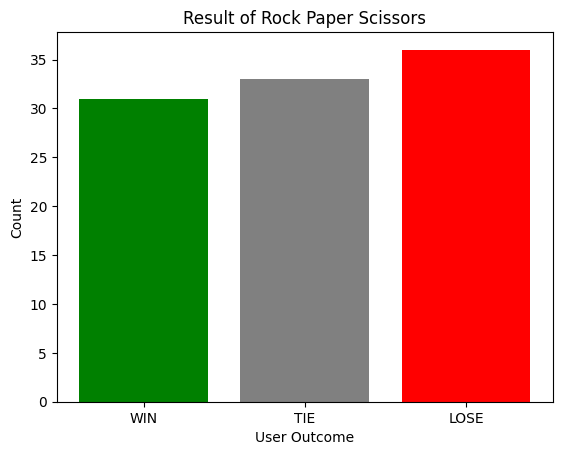

In [112]:
user_choice = 0
W, T, L = 0, 0, 0
results = []

for _ in range(100):
    qc_choice = qc_shot()
    if find_winner(user_choice, qc_choice) == 'YOU WIN':
        W+=1
    elif find_winner(user_choice, qc_choice) == 'TIE':
        T+=1
    else:
        L+=1

results.append((W, T, L))

# generate plot data
labels = ['WIN', 'TIE', 'LOSE']
WIN, TIE, LOSE = results[-1]
counts = (WIN, TIE, LOSE)

# generate plot
plt.bar(labels, counts, color=['green', 'grey', 'red'])
plt.title('Result of Rock Paper Scissors')
plt.xlabel('User Outcome')
plt.ylabel('Count')
plt.show